<a href="https://colab.research.google.com/github/Mintu-Vipin/Semester3/blob/master/MintuVipinJoy_COMP257_Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_olivetti_faces
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

**Load Olivetti Data**

In [2]:
olivetti = fetch_olivetti_faces(random_state=42)
print("Olivetti data Shape",olivetti.data.shape)

X = olivetti["images"]
y = olivetti["target"]

print("\n\nImages\n\n",X)
print("\n\nTarget\n\n",y)

Olivetti data Shape (400, 4096)


Images

 [[[0.30991736 0.3677686  0.41735536 ... 0.37190083 0.3305785  0.30578512]
  [0.3429752  0.40495867 0.43801653 ... 0.37190083 0.338843   0.3140496 ]
  [0.3429752  0.41735536 0.45041323 ... 0.38016528 0.338843   0.29752067]
  ...
  [0.21487603 0.20661157 0.2231405  ... 0.15289256 0.16528925 0.17355372]
  [0.20247933 0.2107438  0.2107438  ... 0.14876033 0.16115703 0.16528925]
  [0.20247933 0.20661157 0.20247933 ... 0.15289256 0.16115703 0.1570248 ]]

 [[0.45454547 0.47107437 0.5123967  ... 0.19008264 0.18595041 0.18595041]
  [0.446281   0.48347107 0.5206612  ... 0.21487603 0.2107438  0.2107438 ]
  [0.49586776 0.5165289  0.53305787 ... 0.20247933 0.20661157 0.20661157]
  ...
  [0.77272725 0.78099173 0.7933884  ... 0.1446281  0.1446281  0.1446281 ]
  [0.77272725 0.7768595  0.7892562  ... 0.13636364 0.13636364 0.13636364]
  [0.7644628  0.7892562  0.78099173 ... 0.15289256 0.15289256 0.15289256]]

 [[0.3181818  0.40082645 0.49173555 ... 0.40082645 0.

In [3]:
#Show distinct people in the dataset
def show_distinct_people(images, unique_ids):
    #Creating 4X10 subplots in  18x9 figure size
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    #For easy iteration flattened 4X10 subplots matrix to 40 array
    axarr=axarr.flatten()
    
    #iterating over user ids
    for unique_id in unique_ids:
        image_index=unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle(f"There are {unique_id+1} distinct people in the dataset")

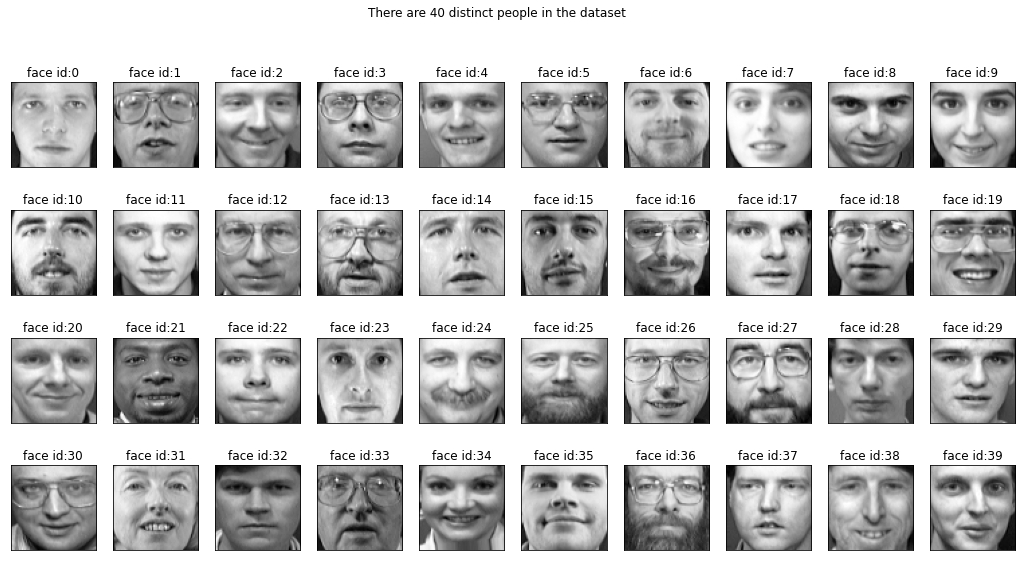

In [4]:
show_distinct_people(X, y)

In [5]:
# Show each people with different photos
def plot_faces( faces, labels, n_cols=5 ):
    n_rows = (len(faces)-1) // n_cols+1
    plt.figure( figsize=(n_cols, n_rows*1.1) )
    for index, (face, label) in enumerate( zip(faces, labels) ):
        plt.subplot( n_rows, n_cols, index+1 )
        plt.imshow( face.reshape(64,64), cmap="gray" )
        plt.axis("off")
        plt.title(label)
    plt.show()

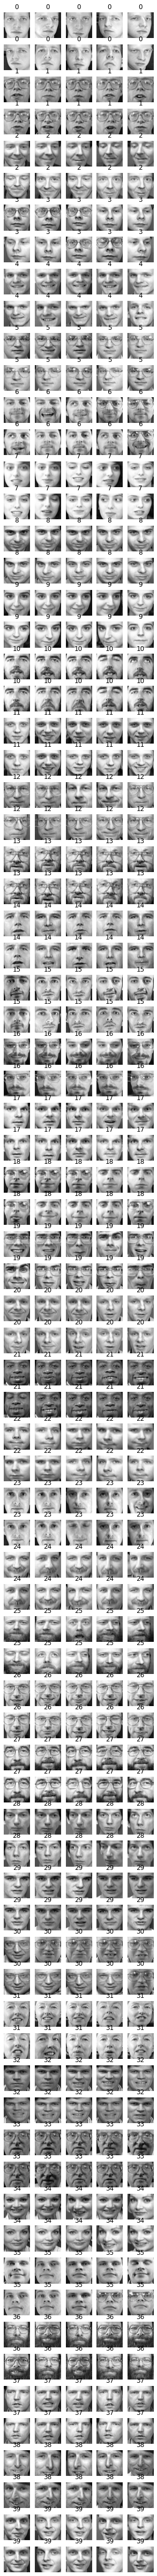

In [6]:
plot_faces(X,y)

In [7]:
nsamples, nx, ny = X.shape
X= X.reshape((nsamples,nx*ny))

X.shape

(400, 4096)

**1.Use PCA preserving 99% of the variance to reduce the dataset’s dimensionality.**

In [8]:
pca =PCA(n_components =0.99, whiten=True)
X_reduced = pca.fit_transform(X)
X_reduced.shape

(400, 260)

**2. Determine the most suitable covariance_type for the dataset.**
**3.Determine the minimum number of clusters that best represent the dataset using either AIC or BIC**
**4. Plot the results from (2) and (3)**

'Selected GMM: full model 3 components'

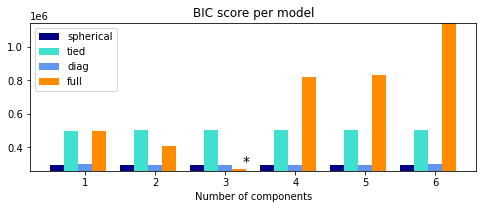

In [72]:
import numpy as np
import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

# Number of samples per component
n_samples = X_reduced.shape

lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ["spherical", "tied", "diag", "full"]
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(
            n_components=n_components, covariance_type=cv_type
        )
        gmm.fit(X_reduced)
        bic.append(gmm.bic(X_reduced))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm
        # print(f"covariance_type:{cv_type} number_of_components: {n_components} BIC:{bic}")

bic = np.array(bic)
color_iter = itertools.cycle(["navy", "turquoise", "cornflowerblue", "darkorange"])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + 0.2 * (i - 2)
    bars.append(
        plt.bar(
            xpos,
            bic[i * len(n_components_range) : (i + 1) * len(n_components_range)],
            width=0.2,
            color=color,
        )
    )
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - 0.01 * bic.max(), bic.max()])
plt.title("BIC score per model")
xpos = (
    np.mod(bic.argmin(), len(n_components_range))
    + 0.65
    + 0.2 * np.floor(bic.argmin() / len(n_components_range))
)
plt.text(xpos, bic.min() * 0.97 + 0.03 * bic.max(), "*", fontsize=14)
spl.set_xlabel("Number of components")
spl.legend([b[0] for b in bars], cv_types)


f'Selected GMM: {best_gmm.covariance_type} model {best_gmm.n_components} components'




Text(0, 0.5, 'BIC')

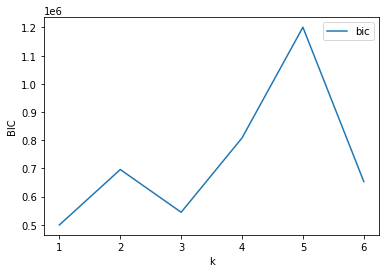

In [73]:
bic_total = []

for k in n_components_range:
    gmm = GaussianMixture(n_components=k)
    gmm.fit(X_reduced)
    bic_total.append(gmm.bic(X_reduced))
    
      
plt.figure()
plt.plot(n_components_range, bic_total, label='bic')
plt.legend()
plt.xlabel('k')
plt.ylabel('BIC')

In [ ]:
# bic_total = []
# cov_total = []

# n_components = [2,3,4,5]
# cov_types = ['spherical', 'diag', 'tied', 'full']

# for type in cov_types:
#     for k in n_components:
#         gmm = GaussianMixture(n_components = k, covariance_type=type)
#         gmm.fit(X_reduced)
#         bic = gmm.bic(X_reduced)
#         # labels = gmm.predict(X_reduced)
        
#         print(f"covariance_type:{type} number_of_components: {k} BIC:{bic}")
#         bic_total.append(bic)
#         cov_total.append(type)
 
        
        
# width = 0.2
# mk = np.array(n_components)
# x = np.array(bic_total)

# spherical_data = x[0:4]
# tied_data = x[4:8]
# diag_data = x[8:12]
# full_data = x[12:16]

# plt.figure(figsize=(12,6))
# plt.bar(mk-0.2, spherical_data, width, label='spherical')
# plt.bar(mk, tied_data, width, label='tied')
# plt.bar(mk+0.2, diag_data, width, label='diag')
# plt.bar(mk+0.4, full_data, width, label='full')
# plt.xticks(mk)
# plt.xlabel("k")
# plt.ylabel("Information Criteria")
# plt.legend()
# plt.show()


We tried out various combinations of the parameters and selected the model with the lowest BIC score(Selected GMM: full model 3 components
)

In [101]:
gmm_bestModel = GaussianMixture(n_components =3, covariance_type="full")
gmm_bestModel.fit(X_reduced)  

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

**5. Output the hard clustering for each instance.**

In [102]:
gmm_bestModel.predict(X_reduced)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

**6. Output the soft clustering for each instance.**

In [103]:
gmm_bestModel.predict_proba(X_reduced)

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

**7. Use the model to generate some new faces (using the sample() method), and visualize them (use the inverse_transform() method to transform the data back to its original space based on the PCA method used).**

In [104]:
# New samples
n_new_faces = 400
X_new_reduced, y_new = gmm_bestModel.sample( n_samples=n_new_faces)
X_new_reduced.shape, y_new.shape

((400, 260), (400,))

In [105]:
# Inverse to visualize
X_new_inverse = pca.inverse_transform(X_new_reduced)
X_new_inverse.shape

(400, 4096)

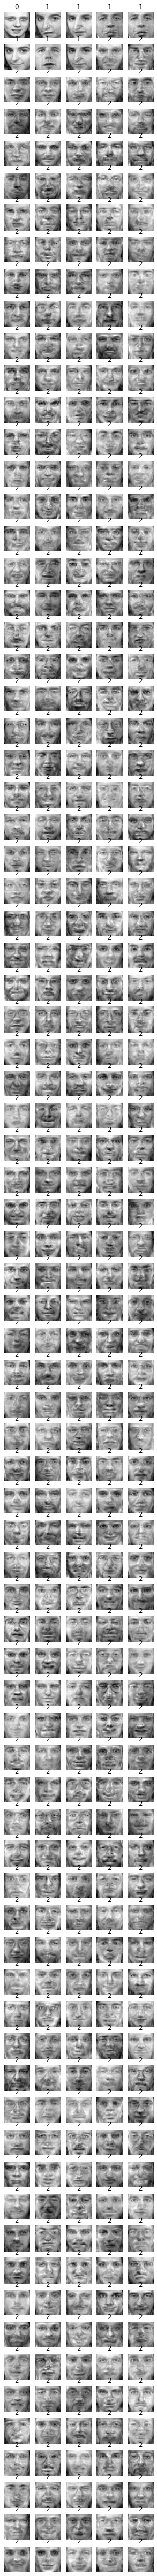

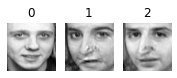

In [106]:
# Visualize
plot_faces(X_new_inverse, y_new)
plot_faces(X_new_inverse, np.unique(y_new))

**8. Modify some images (e.g., rotate, flip, darken).**

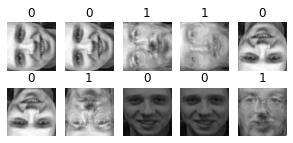

In [87]:
n_rotated = 4         #X_new.shape:(400,4096)                              #z x y  
rotated = np.transpose(X_new_inverse[:n_rotated].reshape(-1, 64,64), axes=[0,2,1])
rotated = rotated.reshape(-1,64*64) # rotated face 
y_rotated = y_new[:n_rotated]

n_flipped = 3                        #(3,64,64)
flipped = X_new_inverse[:n_flipped].reshape(-1,64,64)[:,::-1] #Reverse rows
flipped = flipped.reshape(-1,64*64) # flipped face
y_flipped = y_new[:n_flipped]

n_darkened =3
darkened = X_new_inverse[:n_darkened].copy()
darkened[:,1:-1] *=0.3  #dark
darkened = darkened.reshape(-1,64*64) # darkened face
y_darkened = y_new[:n_darkened]

X_modify_faces = np.r_[rotated, flipped, darkened] # np.r_ for list and return an array
y_modify = np.r_[y_rotated, y_flipped, y_darkened] # np.concatenate([y_rotated, y_flipped, y_darkened]) 

plot_faces(X_modify_faces, y_modify)

**9. Determine if the model can detect the anomalies produced in (8) by comparing the output of the score_samples() method for normal images and for anomalies).**

In [89]:
X_modify_faces_pca = pca.transform(X_modify_faces)
print(X_modify_faces_pca)

print(gmm_bestModel.score_samples(X_modify_faces_pca))

print(gmm_bestModel.score_samples(X_reduced[:10]))

[[ 1.13791464 -1.61387339 -1.24371076 ... -2.92525313 -3.56759291
   1.50945429]
 [ 1.14010601 -1.61466248 -1.24162467 ... -2.92691216 -3.56744661
   1.50758799]
 [ 0.85291826 -1.02751542 -0.96316367 ...  0.39249614 -4.19341553
  -2.44735743]
 ...
 [ 5.56882405  1.58503097 -0.24636397 ...  0.46164106 -0.07162142
  -0.59389836]
 [ 5.569576    1.58446702 -0.2461317  ...  0.46178035 -0.07156796
  -0.59372435]
 [ 5.52616112  1.37143209 -0.63433833 ...  0.13340054 -0.09847154
  -0.41024907]]
[-1434.81222903 -1433.79034999 -1301.69879794 -1240.30690018
 -2062.07064744 -2061.8901945  -1216.19742513  -434.62160529
  -434.60504914  -341.82116326]
[ 923.38397718 -350.11006681 -350.42186321 -325.93214179 -357.29374946
 -356.10328331 -345.73163045 -330.67190692 -355.52494076  923.38396959]


In [90]:
X_reduced

array([[-1.4819851 , -0.21147694, -0.56952757, ...,  0.659835  ,
        -1.2461478 , -1.6262221 ],
       [-0.24787557, -2.0127654 ,  0.7339257 , ..., -0.26080638,
        -0.6743109 ,  0.7413285 ],
       [-1.219426  , -0.46357274,  0.08999403, ..., -1.3233975 ,
        -0.49298197,  0.6109254 ],
       ...,
       [ 0.47016475, -0.45368755,  1.3735056 , ...,  0.8387996 ,
         0.8258972 ,  0.16537678],
       [-1.1899981 ,  2.4333425 , -0.26723847, ..., -0.88014144,
        -0.86099267, -0.23521389],
       [-0.26506025,  0.7318081 ,  0.47373232, ...,  0.33758816,
         0.09697472, -0.16943641]], dtype=float32)

In [91]:
def reconstruction_errors(pca, X):
    X_pca = pca.transform(X)  #reduce X's dimensions with PCA
    X_reconstructed = pca.inverse_transform(X_pca)
    mse = np.square( X_reconstructed-X ).mean(axis= 1) #==.mean(axis= -1)
    return mse

In [92]:
reconstruction_errors(pca, X).mean()

0.00019257102

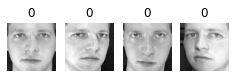

In [93]:
plot_faces(X[:4], y)

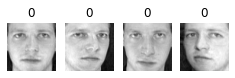

In [95]:
plot_faces(pca.inverse_transform(pca.transform( X[:4] )), y[:4] )

In [96]:
reconstruction_errors(pca, X_modify_faces).mean(axis=0)

0.005397248842787045

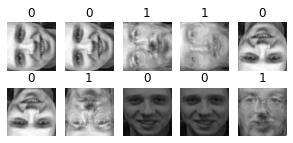

In [97]:
plot_faces(X_modify_faces, y_modify)

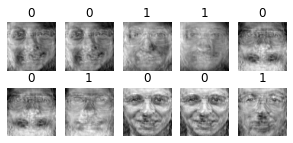

In [98]:
X_modify_faces_reconstructed = pca.inverse_transform(X_modify_faces_pca)
plot_faces(X_modify_faces_reconstructed, y_modify)